# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python Learning\SeoulBikeData.csv',sep=',',encoding='latin')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [6]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
#Rename the Columns
column_dict = {'Date':'date', 'Rented Bike Count':'rented_bikes', 'Hour':'hour', 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility', 
               'Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radition', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)': 'snowfall', 'Seasons':'seasons', 'Holiday':'holiday', 'Functioning Day':'functioning_day'}

In [8]:
df.rename(columns= column_dict, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bikes           8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radition         8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [10]:
df.describe()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
len(df[df.duplicated()])

0

In [12]:
df.nunique()

date                      365
rented_bikes             2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radition            345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functioning_day             2
dtype: int64

In [13]:
len(df['date'].value_counts())*len(df['hour'].value_counts())

8760

####Extracting the 'date', 'month' from complete date

In [14]:
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

In [16]:
df['week'] = df['day_name'].apply(lambda x: "weekend" if x=='Saturday' or x == 'Sunday' else 'weekday')

In [17]:
df.head()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


In [18]:
df.tail()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday


In [19]:
df.tail()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday


In [20]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'month_name', 'day', 'day_name', 'week'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bikes           8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radition         8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  seasons                8760 non-null   object        
 12  holiday                8760 non-null   object        
 13  fun

In [22]:
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

In [23]:
df['functioning_day'].value_counts()

Yes    8465
No      295
Name: functioning_day, dtype: int64

####Try the database with functioning day

In [24]:
df['functioning_day'].value_counts()

Yes    8465
No      295
Name: functioning_day, dtype: int64

In [25]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'month_name', 'day', 'day_name', 'week'],
      dtype='object')

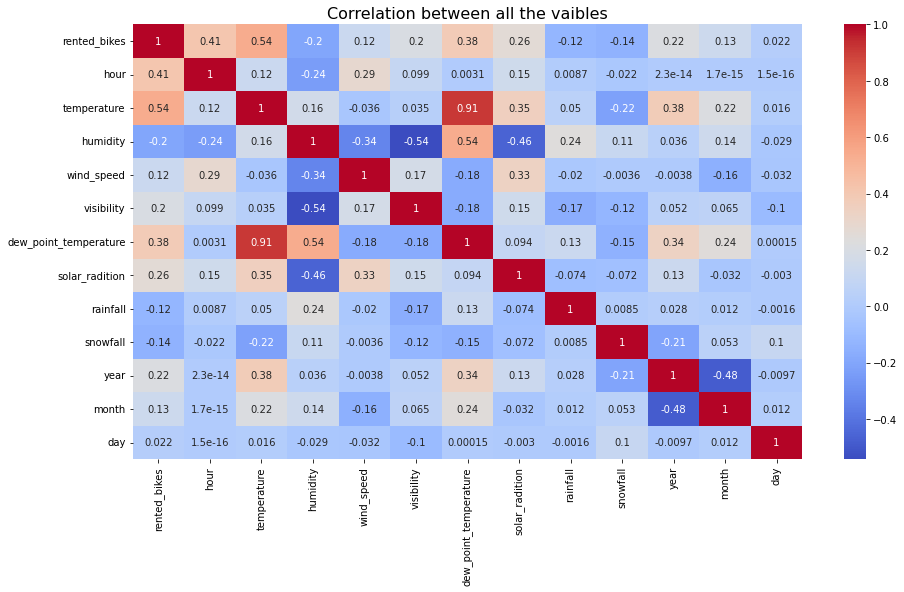

In [26]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [27]:
df.drop(columns= ['date','dew_point_temperature'], inplace=True)

In [28]:
df.head()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


###EDA of Every Feature

In [29]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rented_bikes     8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar_radition   8760 non-null   float64
 7   rainfall         8760 non-null   float64
 8   snowfall         8760 non-null   float64
 9   seasons          8760 non-null   object 
 10  holiday          8760 non-null   object 
 11  functioning_day  8760 non-null   object 
 12  year             8760 non-null   int64  
 13  month            8760 non-null   int64  
 14  month_name       8760 non-null   object 
 15  day              8760 non-null   int64  
 16  day_name         8760 non-null   object 
 17  week          

###Converting columns into 'Categorical' and 'Numerical'

In [31]:
numerical_columns = ['rented_bikes','temperature','humidity','wind_speed','visibility','solar_radition','rainfall','snowfall']
categorical_columns = ['hour','day','seasons','holiday', 'functioning_day', 'year','month','week']

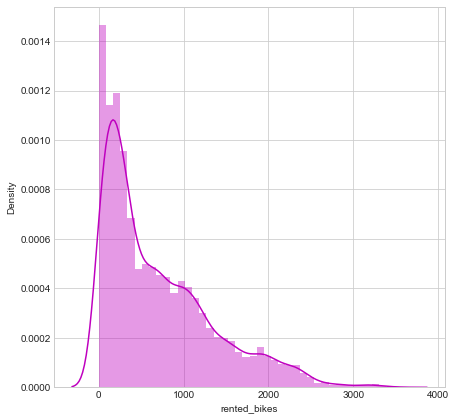

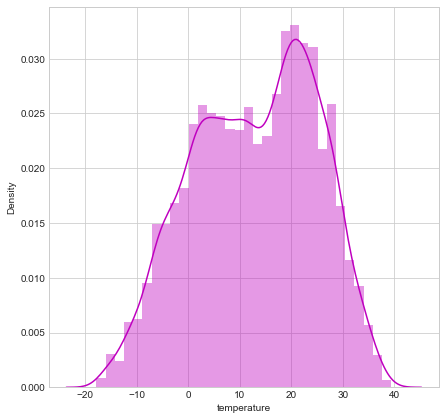

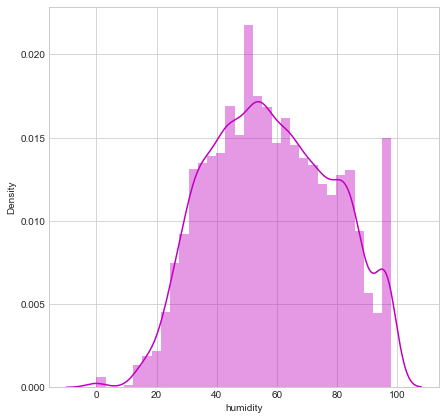

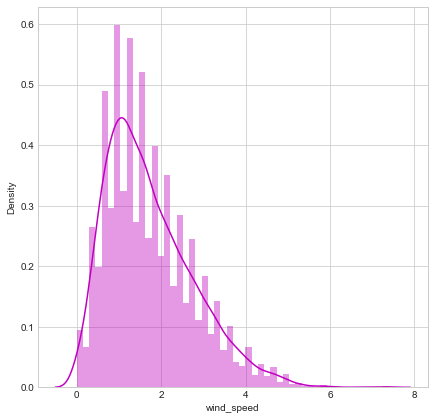

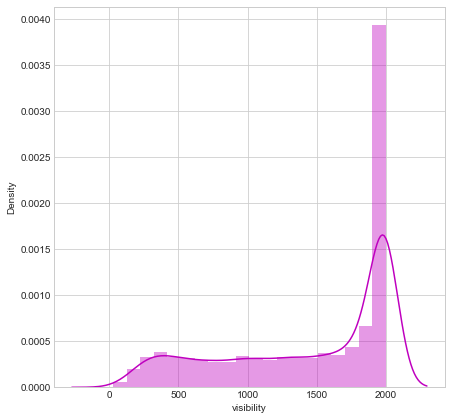

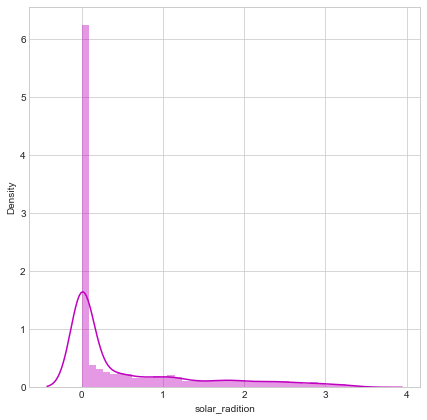

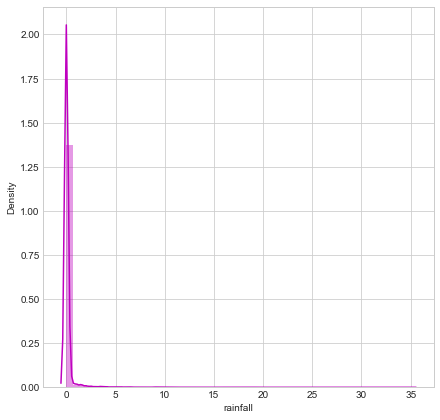

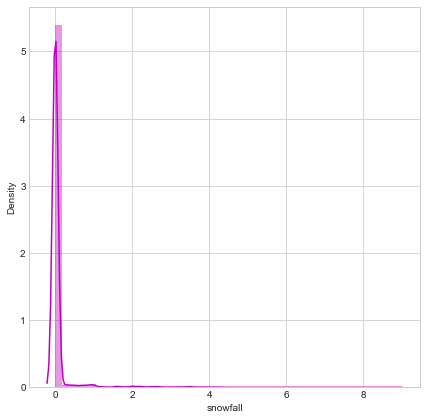

In [32]:
#distplot for numerical features
for val in numerical_columns:
  plt.figure(figsize=(7,7))
  plt.style.use('seaborn-whitegrid')
  sns.distplot(df[val],color="m")
  plt.show()

In [33]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

####Bar Graphs for Rented Bikes and other features

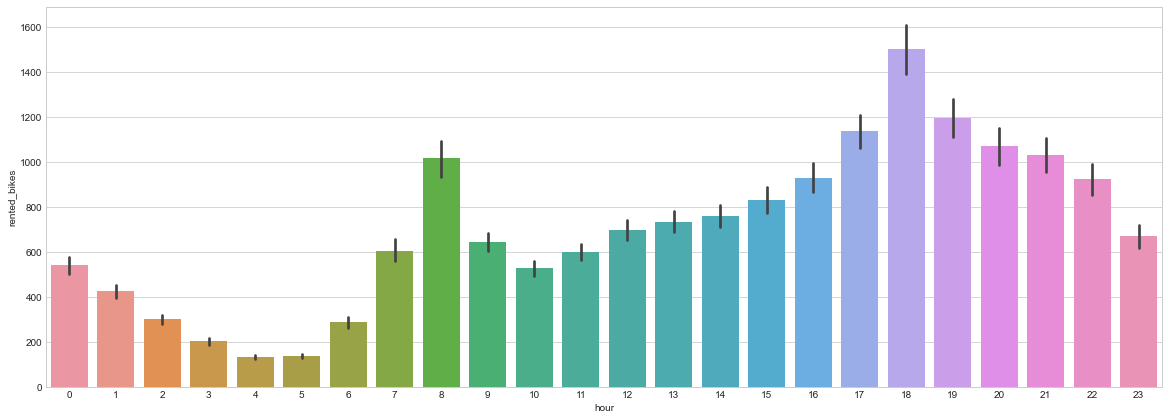

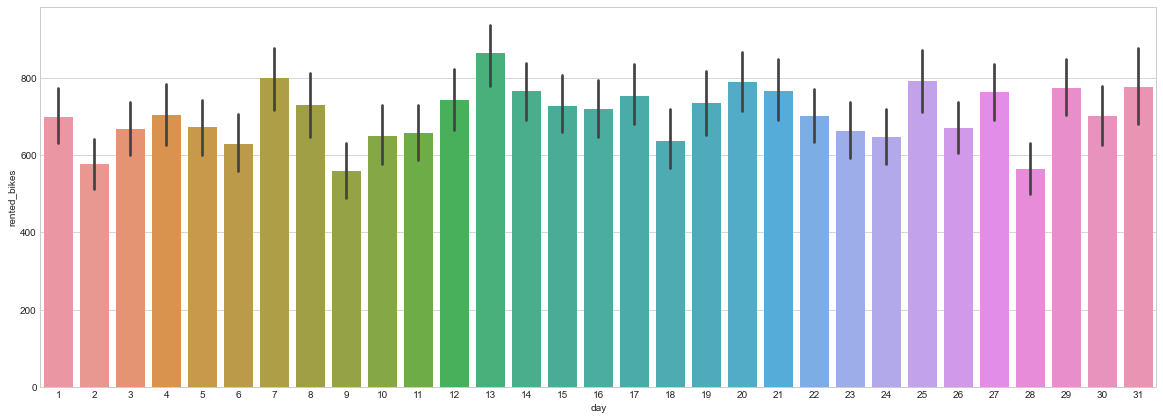

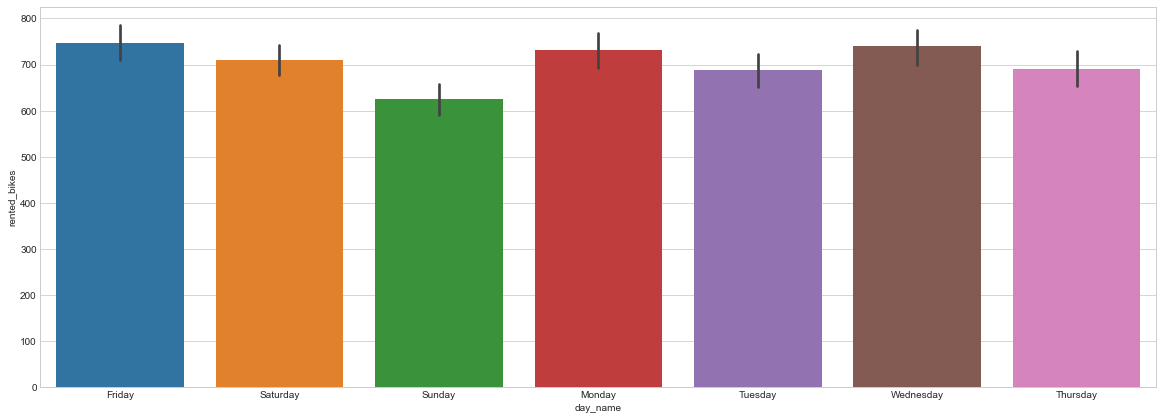

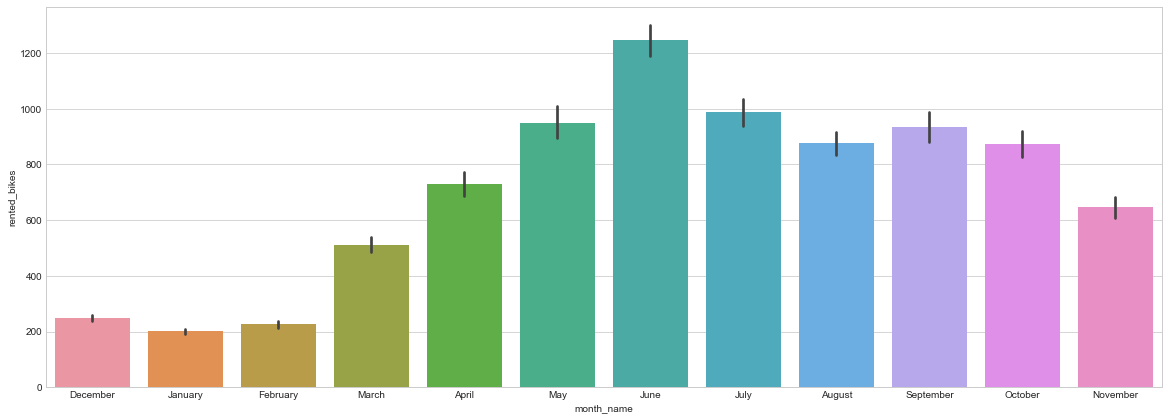

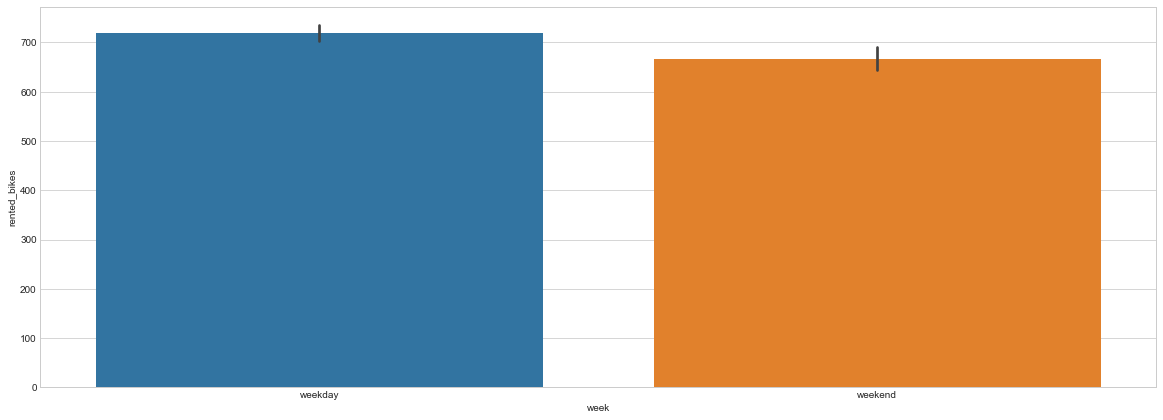

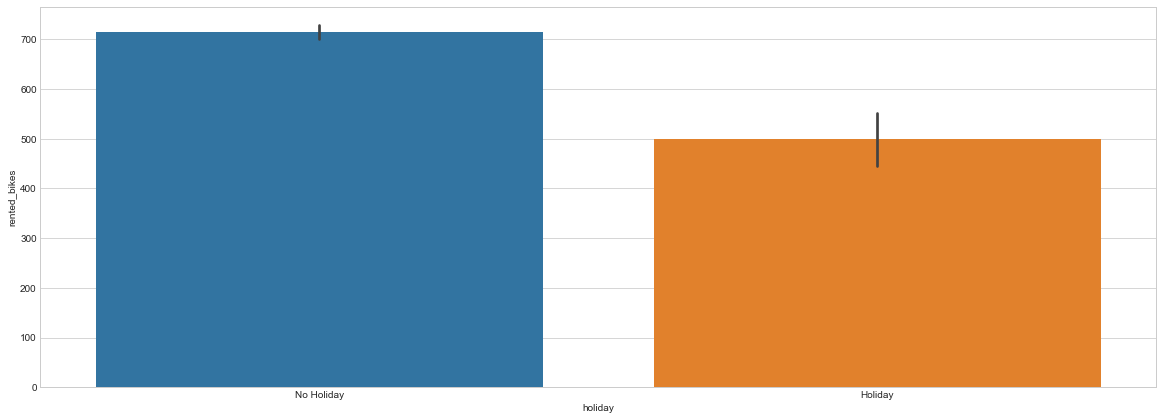

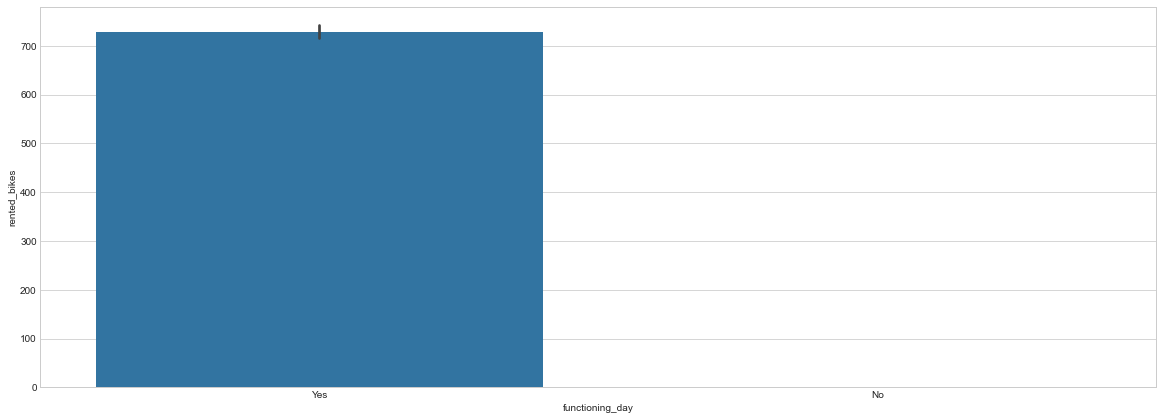

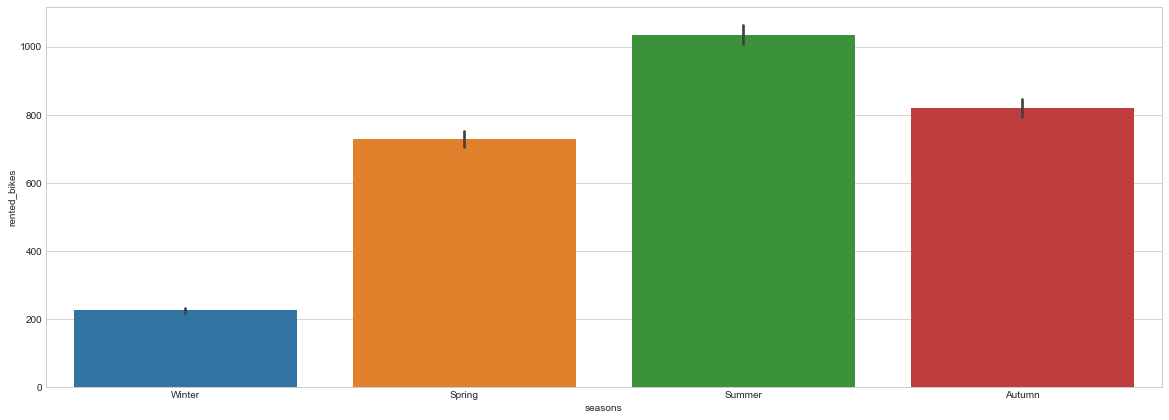

In [34]:
temp_list = ['hour','day', 'day_name', 'month_name', 'week','holiday','functioning_day','seasons']
for col in temp_list:
  plt.figure(figsize=(20,7))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='rented_bikes')

####Check Outliars

In [35]:
print("Skewness: %f" % df['rented_bikes'].skew())
print("Kurtosis: %f" % df['rented_bikes'].kurt())

Skewness: 1.153428
Kurtosis: 0.853387


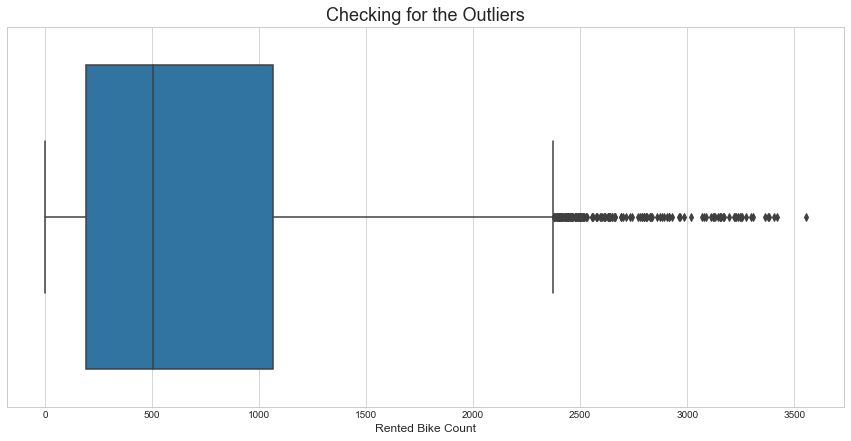

In [36]:
#box plot
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=df['rented_bikes'])
plt.title('Checking for the Outliers', size=18)
plt.xlabel('Rented Bike Count', size=12)
plt.show()

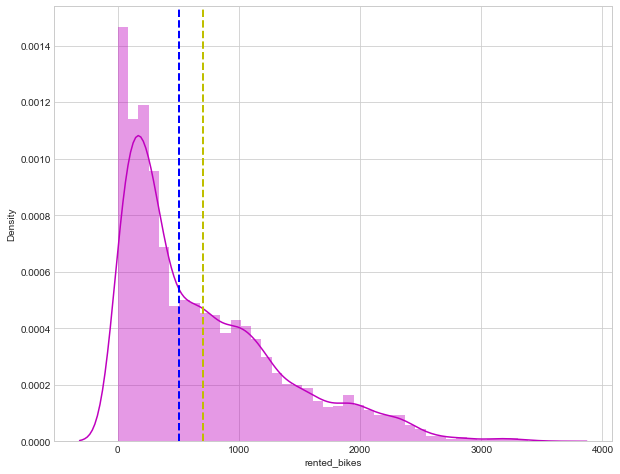

In [37]:
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
ax=sns.distplot(df['rented_bikes'],color="m")
ax.axvline((df['rented_bikes']).mean(), color='y', linestyle='dashed', linewidth=2)
ax.axvline((df['rented_bikes']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()


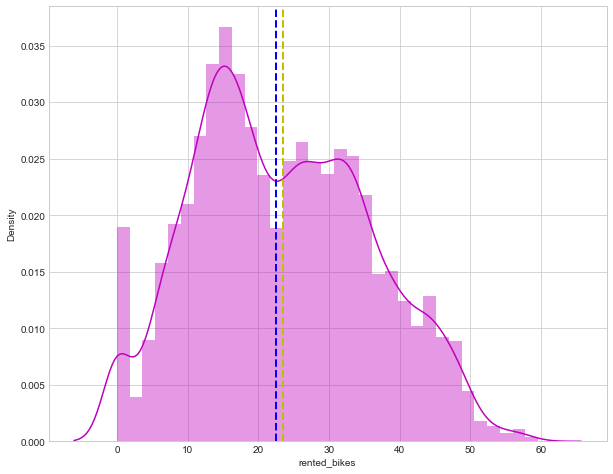

In [38]:
#Let's apply square root to reduce skewness
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
#plt.ylabel('Density')
ax=sns.distplot(np.sqrt(df['rented_bikes']),color="m")
ax.axvline(np.sqrt(df['rented_bikes']).mean(), color='y', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['rented_bikes']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()

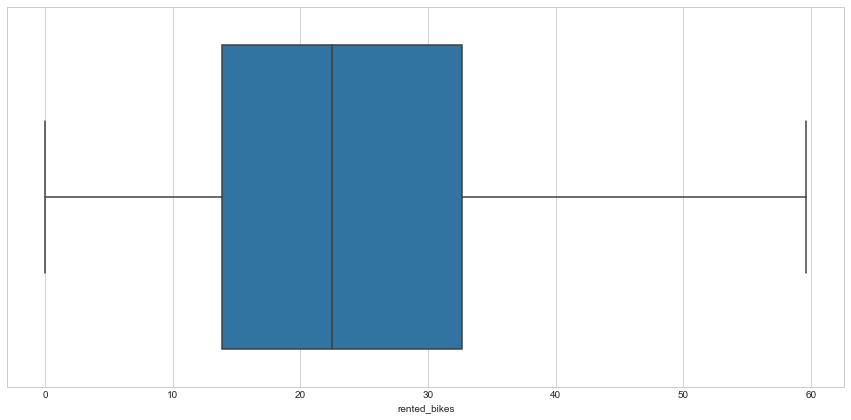

In [39]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=np.sqrt(df['rented_bikes']))

plt.show()

In [40]:
#before 

In [41]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [42]:
#calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bikes']]])
calc_vif(df[[i for i in numerical_columns if i not in ['rented_bikes']]])

,variables,VIF
0,temperature,3.166007
1,humidity,4.758651
2,wind_speed,4.079926
3,visibility,4.409448
4,solar_radition,2.246238
5,rainfall,1.078501
6,snowfall,1.118901


In [43]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

In [44]:
df_copy = df.copy()

In [45]:
df_copy['visibility'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: visibility, Length: 1789, dtype: int64

In [46]:
df_copy['functioning_day']  = df['functioning_day'].apply(lambda x: 0 if x == 'No' else 1)

In [47]:
df_copy['visibility'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: visibility, Length: 1789, dtype: int64

In [48]:
#'visibility','solar_radition', 'rainfall' and 'snowfall' are highly skewed so we will convert them into categorical
df_copy['solar_radition'] = df_copy['solar_radition'].apply(lambda x: 0 if x==0.00 else 1)
df_copy['snowfall'] = df_copy['snowfall'].apply(lambda x: 0 if x==0.0 else 1)
df_copy['rainfall'] = df_copy['rainfall'].apply(lambda x: 0 if x==0.0 else 1)
df_copy['visibility'] = df_copy['visibility'].apply(lambda x: 0 if x<2000 else(1 if 1000<x<2000 else 2))

In [49]:
df_copy.head()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday


In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rented_bikes     8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar_radition   8760 non-null   int64  
 7   rainfall         8760 non-null   int64  
 8   snowfall         8760 non-null   int64  
 9   seasons          8760 non-null   object 
 10  holiday          8760 non-null   object 
 11  functioning_day  8760 non-null   int64  
 12  year             8760 non-null   int64  
 13  month            8760 non-null   int64  
 14  month_name       8760 non-null   object 
 15  day              8760 non-null   int64  
 16  day_name         8760 non-null   object 
 17  week          

In [51]:
df_copy = pd.get_dummies(df_copy, columns = ['hour','visibility', 'seasons', 'holiday', 'month','day_name','week'])
df_copy

,rented_bikes,temperature,humidity,wind_speed,solar_radition,rainfall,snowfall,functioning_day,year,month_name,...,month_12,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,week_weekday,week_weekend
0,254,-5.2,37,2.2,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0,0,0,1,2018,November,...,0,1,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0,0,0,1,2018,November,...,0,1,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0,0,0,1,2018,November,...,0,1,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0,0,0,1,2018,November,...,0,1,0,0,0,0,0,0,1,0


In [52]:
df_copy = df_copy.drop(columns=['year','month_name','day'])

In [53]:
df_copy

,rented_bikes,temperature,humidity,wind_speed,solar_radition,rainfall,snowfall,functioning_day,hour_0,hour_1,...,month_12,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,week_weekday,week_weekend
0,254,-5.2,37,2.2,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [54]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rented_bikes        8760 non-null   int64  
 1   temperature         8760 non-null   float64
 2   humidity            8760 non-null   int64  
 3   wind_speed          8760 non-null   float64
 4   solar_radition      8760 non-null   int64  
 5   rainfall            8760 non-null   int64  
 6   snowfall            8760 non-null   int64  
 7   functioning_day     8760 non-null   int64  
 8   hour_0              8760 non-null   uint8  
 9   hour_1              8760 non-null   uint8  
 10  hour_2              8760 non-null   uint8  
 11  hour_3              8760 non-null   uint8  
 12  hour_4              8760 non-null   uint8  
 13  hour_5              8760 non-null   uint8  
 14  hour_6              8760 non-null   uint8  
 15  hour_7              8760 non-null   uint8  
 16  hour_8

In [75]:
y = np.sqrt(df_copy['rented_bikes'])

In [76]:
X = df_copy.drop(columns = ['rented_bikes'])#,'day'])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

(7008, 60)
(1752, 60)


In [78]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8100824109052588

In [59]:
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

In [60]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

#Adjuste_R2 

MSE= 29.356675898478645
RMSE= 5.4181801279099835
R2_Score= 0.8100824109052588


In [61]:
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

R2_Score= 0.8061641236086097


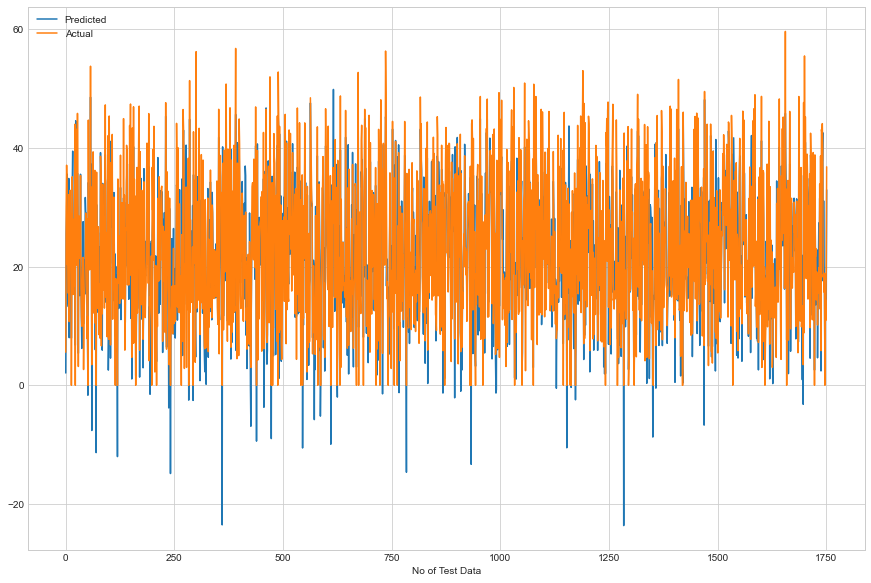

In [62]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

####Random Forest

In [ ]:
#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)
#training the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=5)

In [ ]:
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

In [ ]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 1.504794277470385
RMSE= 1.2267005655294958
R2_Score= 0.9902650115343764


In [ ]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 10.791797100673207
RMSE= 3.285087076573954
R2_Score= 0.9309382142476471


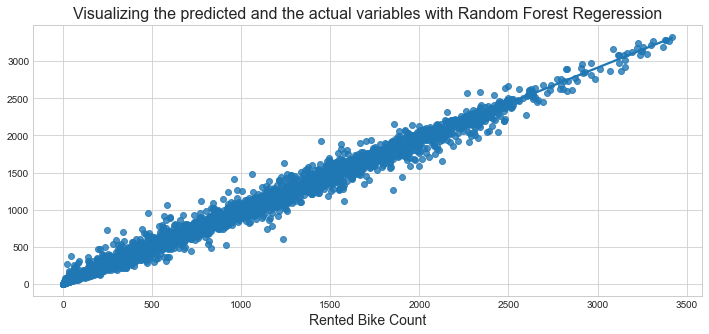

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train*y_train, pred_train*pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

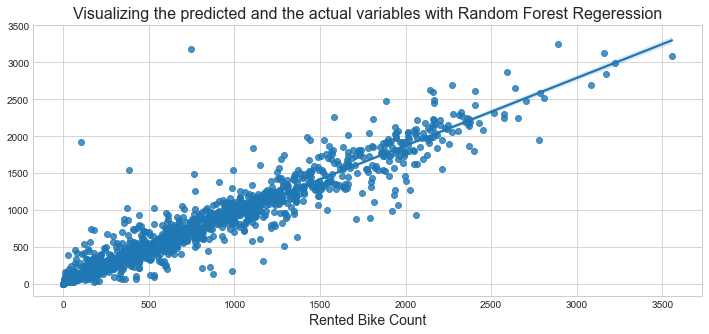

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test*y_test, pred_test*pred_test)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()